# <a id='toc1_'></a>[$$ Day-9-Assignment $$](#toc0_)

---

![Screenshot 2024-06-20 061505.png](<attachment:Screenshot 2024-06-20 061505.png>)

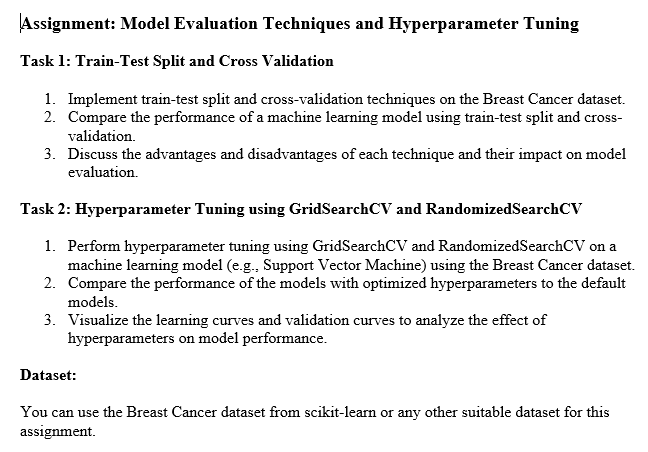

---


## **Table of contents**<a id='toc0_'></a>    
### [$$ Day-9-Assignment $$](#toc1_)    
  - [**Task 1: Train-Test Split and Cross Validation**](#toc1_1_)    
    - [Implement train-test split and cross-validation techniques on the Breast Cancer dataset.](#toc1_1_1_)    
    - [`Train-Test-Split`](#toc1_1_2_)    
    - [`Cross-Validation`](#toc1_1_3_)    
    - [Compare the performance of a machine learning model using train-test split and cross-validation.](#toc1_1_4_)    
    - [Discuss the advantages and disadvantages of each technique and their impact on model evaluation.](#toc1_1_5_)    
    - [Answer:](#toc1_1_6_)    
      - [**Train-Test-split**](#toc1_1_6_1_)    
        - [`Advantages`](#toc1_1_6_1_1_)    
        - [`Disadvantages`](#toc1_1_6_1_2_)    
      - [**Cross-Validation**](#toc1_1_6_2_)    
        - [`Advantages`](#toc1_1_6_2_1_)    
        - [`Disadvantages`](#toc1_1_6_2_2_)    
  - [**Task 2: Hyperparameter Tuning using GridSearchCV and RandomizedSearchCV**](#toc1_2_)    
    - [Perform hyperparameter tuning using GridSearchCV and RandomizedSearchCV on a machine learning model (e.g., Support Vector Machine) using the Breast Cancer dataset.](#toc1_2_1_)    
    - [Compare the performance of the models with optimized hyperparameters to the default models.](#toc1_2_2_)    
    - [Visualize the learning curves and validation curves to analyze the effect of hyperparameters on model performance.](#toc1_2_3_)    
    - [**Comparision**](#toc1_2_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

---

In [1]:
# -----> Required libraries
try:
    import numpy as np
    import pandas as pd
    from sklearn.datasets import load_breast_cancer  # loading data from scikit-learn
    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score
    import warnings
except:
    !pip install numpy
    !pip install pandas
    !pip install scikit_learn
    
    import numpy as np
    import pandas as pd
    from sklearn.datasets import load_breast_cancer  # loading data from scikit-learn
    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score
    import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
""" Loading the dataset """
data = load_breast_cancer()
X = data.data
y = data.target


# shape of the dataset after spliting
X.shape, y.shape

((569, 30), (569,))

---
---

## <a id='toc1_1_'></a>[**Task 1: Train-Test Split and Cross Validation**](#toc0_)


----
---

### <a id='toc1_1_1_'></a>[Implement train-test split and cross-validation techniques on the Breast Cancer dataset.](#toc0_)

### <a id='toc1_1_2_'></a>[`Train-Test-Split`](#toc0_)

In [4]:
# Splitting data into train and test using train test split method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = log_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy using train-test-split: ",test_accuracy)


Test accuracy using train-test-split:  0.956140350877193


### <a id='toc1_1_3_'></a>[`Cross-Validation`](#toc0_)

In [5]:
# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(log_model, X, y, cv=5)
cross_val_mean_accuracy = cross_val_scores.mean()
print("Test accuracy using cross-validation: ",cross_val_mean_accuracy)

Test accuracy using cross-validation:  0.9507995652848935


---

### <a id='toc1_1_4_'></a>[Compare the performance of a machine learning model using train-test split and cross-validation.](#toc0_)

In [6]:
print((test_accuracy,cross_val_mean_accuracy))
print()
if test_accuracy > cross_val_mean_accuracy:
    print("Comparison of train-test-split and cross-validation:")
    print(f"Train-test-split ({test_accuracy}) perform well for this dataset compared to cross-validation({cross_val_mean_accuracy})")
else:
    print("Comparison of train-test-split and cross-validation:")
    print(f"cross-validation({cross_val_mean_accuracy})  perform well for this dataset compared to Train-test-split ({test_accuracy})")

(0.956140350877193, 0.9507995652848935)

Comparison of train-test-split and cross-validation:
Train-test-split (0.956140350877193) perform well for this dataset compared to cross-validation(0.9507995652848935)


---

### <a id='toc1_1_5_'></a>[Discuss the advantages and disadvantages of each technique and their impact on model evaluation.](#toc0_)

### <a id='toc1_1_6_'></a>[Answer:](#toc0_)
#### <a id='toc1_1_6_1_'></a>[**Train-Test-split**](#toc0_)

##### <a id='toc1_1_6_1_1_'></a>[`Advantages`](#toc0_)
 1. Simple
 2. Faster
 3. Used for large datasets

##### <a id='toc1_1_6_1_2_'></a>[`Disadvantages`](#toc0_)
 1. Model performance is highly dependable on how we split the data
 2. only splited subset of data is used to train and test. so the robustness of the model is not upto the mark.
 3. usage of subset results in less utilization of data.
---
#### <a id='toc1_1_6_2_'></a>[**Cross-Validation**](#toc0_)

##### <a id='toc1_1_6_2_1_'></a>[`Advantages`](#toc0_)
 1. More robust than train-test-split - ***because, it will take the average results over multiple splits***
 2. Full utilization of data.
 3. Model performance is less dependable on how we split the data

##### <a id='toc1_1_6_2_2_'></a>[`Disadvantages`](#toc0_)
 1. Requires training the model multiple times, which can be time-consuming, especially for large datasets.

---
---

## <a id='toc1_2_'></a>[**Task 2: Hyperparameter Tuning using GridSearchCV and RandomizedSearchCV**](#toc0_)

---
---

### <a id='toc1_2_1_'></a>[Perform hyperparameter tuning using GridSearchCV and RandomizedSearchCV on a machine learning model (e.g., Support Vector Machine) using the Breast Cancer dataset.](#toc0_)

In [7]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid

"""_summary_
    C : inverse regularization strengths
    solver : algorithms to use for optimization
"""
param_grid = {
    'C': [0.1, 1, 10, 100, 1000], # it specifies different regularization strengths
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # list of algorithms for optimization
}

# Perform GridSearchCV
grid_search_log = GridSearchCV(LogisticRegression(max_iter=500000), param_grid, refit=True, cv=5)

"""_summary_
    max_iter: specifies no.of iternation for the solver to converge
    param_grid : dictinory of parameters we specify
    refit: after finding best parameters, refit the model with entire training dataset
    cv: specifies the number of folds for cross-validation
"""

grid_search_log.fit(X_train, y_train)

# Get the best parameters and best score
grid_search_log.best_params_, grid_search_log.best_score_


({'C': 100, 'solver': 'newton-cg'}, 0.9670329670329672)

In [8]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution


"""_summary_
    C : inverse regularization strengths
    solver : algorithms to use for optimization
"""

param_dist = {
    'C': np.logspace(-3, 3, 10),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Perform RandomizedSearchCV
random_search_log = RandomizedSearchCV(LogisticRegression(max_iter=10000), param_dist, n_iter=10, refit=True, cv=5, random_state=42)

"""_summary_
    max_iter: specifies no.of iternation for the solver to converge
    param_grid : dictinory of parameters we specify
    n_iter: specifies the no.of parameters settings that are sampled ---> only difference between gridsearchcv and randomizedsearchcv
    refit: after finding best parameters, refit the model with entire training dataset
    cv: specifies the number of folds for cross-validation
"""

random_search_log.fit(X_train, y_train)

# Get the best parameters and best score
random_search_log.best_params_, random_search_log.best_score_


({'solver': 'newton-cg', 'C': 1000.0}, 0.964835164835165)

---

### <a id='toc1_2_2_'></a>[Compare the performance of the models with optimized hyperparameters to the default models.](#toc0_)

In [9]:
# Evaluate the GridSearchCV model on the test set
grid_search_log_best_model = grid_search_log.best_estimator_
grid_search_log_test_accuracy = accuracy_score(y_test, grid_search_log_best_model.predict(X_test))

# Evaluate the RandomizedSearchCV model on the test set
random_search_log_best_model = random_search_log.best_estimator_
random_search_log_test_accuracy = accuracy_score(y_test, random_search_log_best_model.predict(X_test))

print("Models with optimized hyperparameters")
print(f"    1. GridSearchCV Test Accuracy: {grid_search_log_test_accuracy}")
print(f"    2. RandomizedSearchCV Test Accuracy: {random_search_log_test_accuracy}")
print()
print("Default models")
print(f"    1. Train-test-split Test Accracy: {test_accuracy}" )
print(f"    2. Cross-validation Test Accuracy: {cross_val_mean_accuracy}")



Models with optimized hyperparameters
    1. GridSearchCV Test Accuracy: 0.956140350877193
    2. RandomizedSearchCV Test Accuracy: 0.9824561403508771

Default models
    1. Train-test-split Test Accracy: 0.956140350877193
    2. Cross-validation Test Accuracy: 0.9507995652848935


---

### <a id='toc1_2_3_'></a>[Visualize the learning curves and validation curves to analyze the effect of hyperparameters on model performance.](#toc0_)

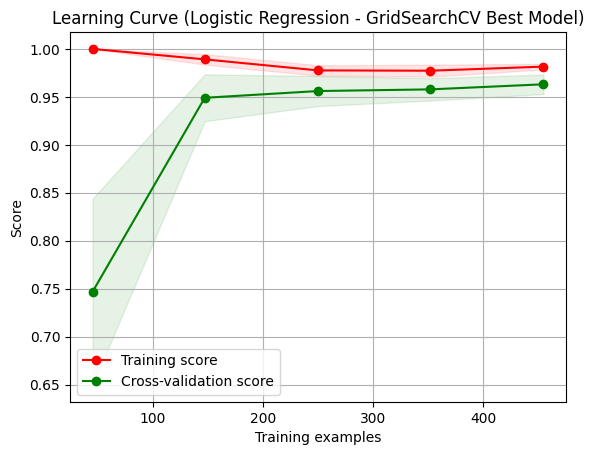

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve

# Plot learning curves for the GridSearchCV best model
train_sizes, train_scores, test_scores = learning_curve(grid_search_log_best_model, X, y, cv=5, n_jobs=-1)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve (Logistic Regression - GridSearchCV Best Model)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot the learning curves
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

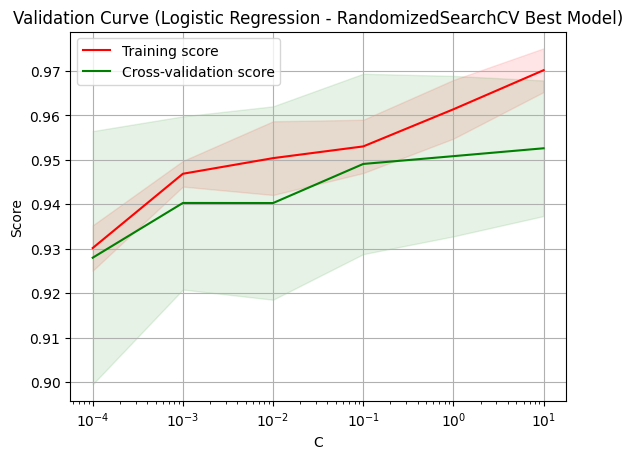

In [11]:

# Plot validation curves for the RandomizedSearchCV best model
param_range = np.logspace(-4, 1, 6)
train_scores, test_scores = validation_curve(LogisticRegression(max_iter=10000), X, y, param_name="C", param_range=param_range, cv=5, n_jobs=-1)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Validation Curve (Logistic Regression - RandomizedSearchCV Best Model)")
plt.xlabel("C")
plt.ylabel("Score")
plt.grid()
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.legend(loc="best")
plt.show()

---

### <a id='toc1_2_4_'></a>[**Comparision**](#toc0_)

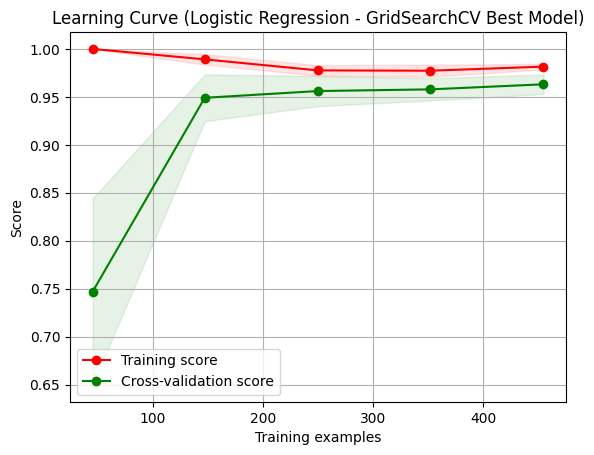 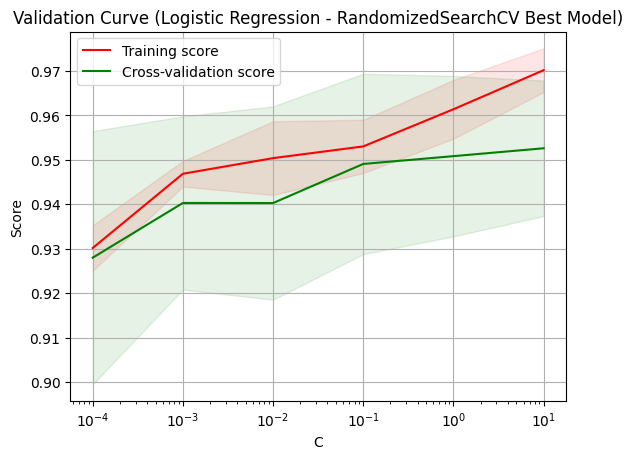

----
---